# **Assignment 1**
# Developed by Biljana Jonoska Stojkova, PhD
# Revised by Johnson Chen

**Insert here your name:** Wei Ning Chan

**Your student ID:** 23385923

**Total Marks earned:** 

**Score for Full Marks:**  70

**Bonus marks:** 20 


### Assignment Outline

In this assignment series, you will get the training needed to complete the final report. With each new assignment you will master different aspects of the final report sections, thus filling different pieces of the puzzle with each assignment.

In this assignment we will practice writing the following sections of a statistical report:

- Introduction and general research objectives, research question
  
- Study design or data descriptions

- Statistical Problem formulation
  
- Methodology - EDA part, choose appropriate graph
  
- Discussion - Limitations from Study design




### Synopsis

In this assignment we will work with the Ames City Iowa housing data set. You can familiarize with the data set here https://jse.amstat.org/v19n3/decock/DataDocumentation.txt.

We will focus on exploring a single research question, so that you can get focused practice of the statistical reasonong and writing. The assignment workbook will provide you with R code snippets and written hints to guide you towards completition of this assignment. Please do not be shy to show your work, discuss or ask any questions. Your Instructor and TAs and here for you! 

Research question: How does Land Slope affect sale price of the properties?



In [1]:
library(tidyverse)
ds_ames = read_csv("../data/ames.csv")
colnames(ds_ames)
ds_ames=ds_ames[,c("Order","Sale_Price","Land_Slope","Neighborhood")]
head(ds_ames)

ds_ames = ds_ames %>% mutate(Land_Slope_Descr= case_when(Land_Slope=="Gtl" ~	"Gentle slope",
                                                         Land_Slope=="Mod" ~	"Moderate Slope",	
                                                         Land_Slope=="Sev" ~	"Severe Slope",TRUE~Land_Slope))



print("Conditions of interest:")
ds_ames %>% count(Land_Slope_Descr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 2925 Columns: 75
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (40): MS_SubClass, MS_Zoning, Street, Alley, Lot_Shape, Land_Contour, Ut...
dbl (35): Order, Lot_Frontage, Lot_Area, Year_Built, Year_Remod_Add, Mas_Vnr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Order"              "MS_SubClass"        "MS_Zoning"         
 [4] "Lot_Frontage"       "Lot_Area"           "Street"            
 [7] "Alley"              "Lot_Shape"          "Land_Contour"      
[10] "Utilities"          "Lot_Config"         "Land_Slope"        
[13] "Neighborhood"       "Condition_1"        "Condition_2"       
[16] "Bldg_Type"          "House_Style"        "Overall_Cond"      
[19] "Year_Built"         "Year_Remod_Add"     "Roof_Style"        
[22] "Roof_Matl"          "Exterior_1st"       "Exterior_2nd"      
[25] "Mas_Vnr_Type"       "Mas_Vnr_Area"       "Exter_Cond"        
[28] "Foundation"         "Bsmt_Cond"          "Bsmt_Exposure"     
[31] "BsmtFin_Type_1"     "BsmtFin_SF_1"       "BsmtFin_Type_2"    
[34] "BsmtFin_SF_2"       "Bsmt_Unf_SF"        "Total_Bsmt_SF"     
[37] "Heating"            "Heating_QC"         "Central_Air"       
[40] "Electrical"         "First_Flr_SF"       "Second_Flr_SF"     
[43] "Gr_Liv_Area"        "Bsmt_Full_Bath"     "Bsmt_Half_Bath"    
[46] "Full_Bath"          "Half_Bath"          "Bedroom_AbvGr"     
[49] "Kitchen_AbvGr"      "TotRms_AbvGrd"      "Functional"        
[52] "Fireplaces"         "Garage_Type"        "Garage_Finish"     
[55] "Garage_Cars"        "Garage_Area"        "Garage_Cond"       
[58] "Paved_Drive"        "Wood_Deck_SF"       "Open_Porch_SF"     
[61] "Enclosed_Porch"     "Three_season_porch" "Screen_Porch"      
[64] "Pool_Area"          "Pool_QC"            "Fence"             
[67] "Misc_Feature"       "Misc_Val"           "Mo_Sold"           
[70] "Year_Sold"          "Sale_Type"          "Sale_Condition"    
[73] "Sale_Price"         "Longitude"          "Latitude"

Order Sale_Price Land_Slope Neighborhood
1 1     215000     Gtl        North_Ames  
2 2     105000     Gtl        North_Ames  
3 3     172000     Gtl        North_Ames  
4 4     244000     Gtl        North_Ames  
5 5     189900     Gtl        Gilbert     
6 6     195500     Gtl        Gilbert

[1] "Conditions of interest:"


Land_Slope_Descr n   
1 Gentle slope     2784
2 Moderate Slope    125
3 Severe Slope       16

### 1. Introduction:

**Background and context of the project**

For this part of the assignment, write one or two sentences that summarize the background and context of the dataset and the research project.

Hint: Look at the link provided (https://jse.amstat.org/v19n3/decock/DataDocumentation.txt) to familiarize yourself with the project. Use the information to help you craft your sentences. Who collected the data, what is the general aim for this project? 

(10 points): 5 points for giving the short story about the data, 5 points for stating the general research objective.


Answer: <br>
Data: <br> 
Data set contains information(about the residential properties' sale price, land slope, neighbourhood, overall condition, utilities, etc.) from the Ames Assessor’s Office of the individual residential properties sold in Ames from the period 2006 to 2010. <br>

General research objective: <br>
The research objective is to find out how the land slope affects the sale price of the properties. This suggests that the objective is to find out the relationship between the landslope (gentle, moderate, severe) and the buyers' willingness to spend on the residential properties (sale price of the residential properties).


**Objectives and research questions**

Write one sentence to clearly define the research quesiton

Hint. We will focus on the research question: How does Land Slope affect sale prices of the properties? Your task is to make sure that this research question is clear enough. Are there any missing componenents such as the target population? Who is the studied subject, which also include study period?


(10 points): 5 points for correctly identifying the target population, 5 points for the study period.

Answer: <br>
How does the Land Slope of the residential properties in Ames affect the sale prices of these properties from 2006 to 2010? Target population: residents who bought properties in Ames. Study period: 2006 to 2010. Objective is to find out the relationship between land slope of properties in Ames and the sale prices of these properties in the time period 2006 to 2010.



### 2. Data Description:

**Overview of the dataset(s) used for the analysis**

Write three concise sentences to provide an overview of this dataset

Hint:

      1. Identify what is being studied in this dataset, i.e., clearly define observational unit.

      2. What is the data structure, i.e., are there repeated measures per observational unit (any sampling units within the observational unit)?
             Is there any obvious clustering between the observational units? If so, state clearly which are these variables?
             
      3. How was the sample generated from the target population? Was it a random sample from the target population or is it the entire target population in our data set (census)?



(12 points): 4 points for each sentence.

Answer: <br>
1. The dataset studies the residential properties sold in Ames from 2006 to 2010, focusing on the sale prices of the residential properties. Observational unit is the Order(ID) of the residential properties. 
2. In the data structure, there are no repeated measures as there are all unique and capture different details of the properties. There are clustering of residential properties such as the neighbourhood.
3. The data is sourced from the Ames Assessor’s Office, encompassing 2930 residential property sales. It represents a complete population (census) of properties sold during the specified period 2006 to 2010 rather than a sampled subset.

**Description of the variables** 

Write two sentences:

    1. State which variables are going to be used for the research question.
    
    2. Indicate data types for each of the variables). Bonus marks for identify a potentially clustering variable in the dataset.


Hint. 1. State the names of the variables in the data set that are going to be used to answer the research question. If there are any other important variables such as clustering variables, also need to be named here. Data types of each variables, number of levels for the categorical variables. 

(10 points) 5 points for statiting the two variables clearly, 5 points for describing their data types (categorical with how many categories? or continuous)

(Bonus 5 points) for identifying potentially clustering variable, that may cluster the Sales Prices.



Answer:

1. Sale Price and Land Slope.
2. Land Slope is a categorical variable with 3 categories (gentle (Gtl), moderate (Mod) and severe (Sev)) and Sale price is a continuous variable.
3. Bonus: Neighbourhood is a potentially clustering variable. Neighbourhood is a categorical variable with 28 categories.

### 3. Statistical Problem formulation

For this part of the assignment, you will:

- Translate the research question into statistical hypotheses.

- Clearly state which variables will be used to solve the statistical problem.

- Clearly state at which sampling level the hypotheses will be tested (with respect to the observational unit, e.g., overall estimates).

- Clearly state how these variables will be used (i.e., any need for aggregation, transformation).


**Step 1.** Choose the statistical problem type from the list below.


List of most common **statistical problem types**:

    A. Hypothesis test, typically if one variable affects the outcome of interest.
      
            
    B. Quantification (estimation) of the strength of associative relationships between the variables.
      
            
    C. Exploring, quantifying and identifying which factors are affecting the outcome of interest.
      
            
    D. Quantification (estimation) of the strength of causal relationships between the variables.
      
            
    E. Predicting the outcome of interest.


(10 points): correcly identifying the statistical problem type

Answer:

A. As we are trying to find out if Land Slope affects the Sale Price of residential properties.



**Step 2.**  Write in one concise sentence the statistical problem(s) that you are trying to solve based on the research question and data structures:

Hint: The explanatory variable has three levels, which brings us to 3 possible pairwise comparisons, introducing the multiple testing problem. These are the possible comparisons: comparing mean Sale Price between Gentle slope and Moderate slope, Gentle slope and Severe slope, or Moderate slope and Severe slope. Can you determine which one of these pairwise comparisons is the most important to define as the primary statistical hypothesis? By prioritizing the pairwise comparisons, you can avoid the multiple testing problem when addressing the primary research question and handle the other two comparisons as secondary research problems with less statistical power.


(10 points): Stating one primary statistical problem (hypothesis). Full marks for choosing any of the 3 possible pairwise comparisons as the primary hypothesis.

(Bonus 5 points): Stating the rest of the possible hypotheses as secondary hypotheses. Full marks for stating the remaining 2 out of the 3 possible pairwise comparisons as secondary hypotheses.

Note: In real-life research, the order of importance of the hypotheses is chosen based on subject matter knowledge. This approach encourages researchers to consider why the data was collected and identify the most important research question they need to answer, so it can be analyzed first. Researchers can then obtain the highest strength of evidence from the data for the most critical research questions.

Answer:<br>
Based on the research question, i am trying to find out relationship between type of land slope and sale price of the properties.    
Primary hypothesis: test whether there is a significant difference or comparing mean of the Sale Price between properties with Gentle slope and properties with Severe slope. <br>
Secondary hypothesis: test whether there is a significant difference or comparing mean of the Sale Price between properties with Gentle slope and properties with Severe slope with regards to the neighbourhood, between properties with Gentle slope and properties with Moderate slope with regards to the neighbourhood, and between properties with Moderate and properties with Severe slope with regards to the neighbourhood.

Run as Markdown cell to see how the Type I Error (probability of finding at least one false positive result) rises with each added test.
<img src="../images/ProbFalsePosit.png" width="400">

### 4. Methodology:

 **Explanation of the Exploratory Data Analysis**  (This paragraph will be integrated part of the methodology section of your statsitical report)

Take a look at this few graphs and select the most appropriate graph to answer the research question:

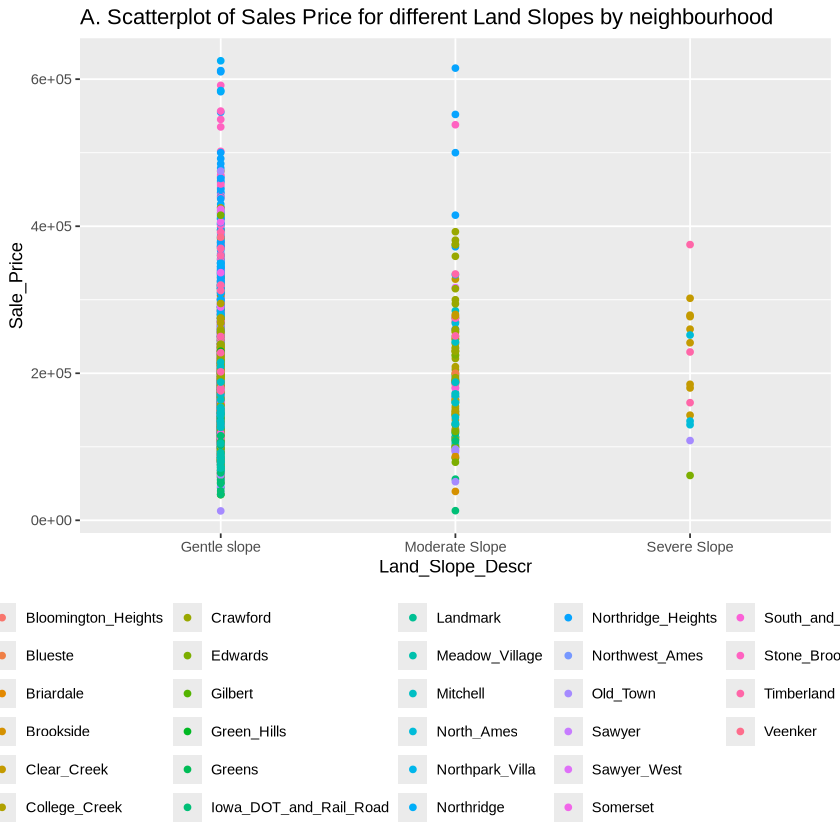

In [3]:
ds_ames %>% ggplot(aes(x=Land_Slope_Descr, y=Sale_Price, color = Neighborhood)) + 
geom_point() + theme(legend.position="bottom") +
labs(title="A. Scatterplot of Sales Price for different Land Slopes by neighbourhood")

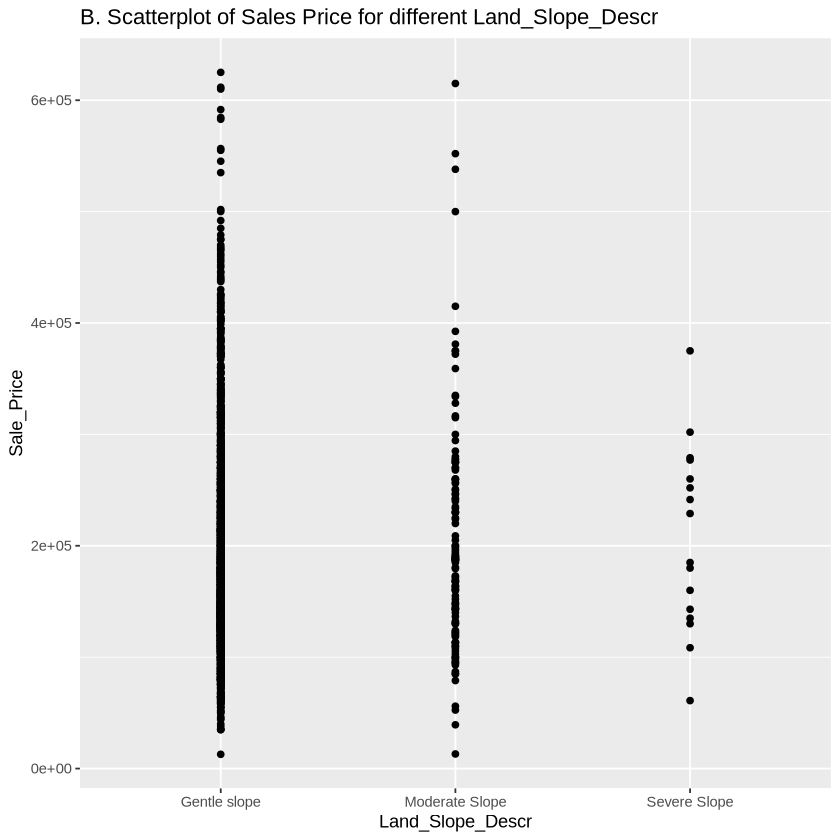

In [4]:
ds_ames %>% ggplot(aes(x=Land_Slope_Descr, y=Sale_Price)) + 
geom_point()  +labs(title="B. Scatterplot of Sales Price for different Land_Slope_Descr")

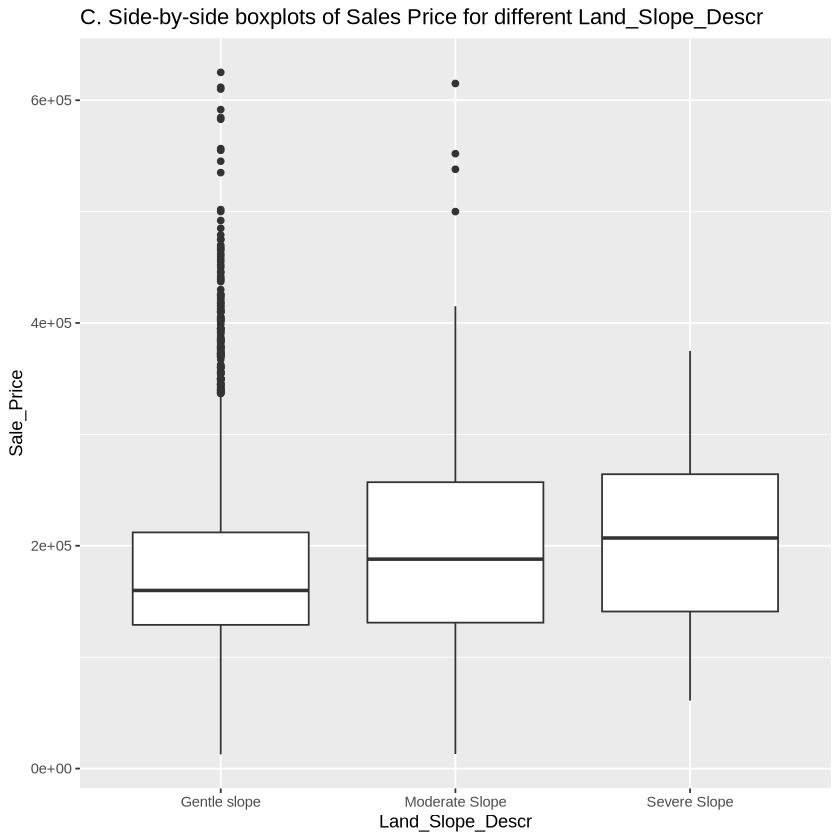

In [5]:
ds_ames %>% ggplot(aes(x=Land_Slope_Descr, y=Sale_Price)) + geom_boxplot()  +
labs(title="C. Side-by-side boxplots of Sales Price for different Land_Slope_Descr")

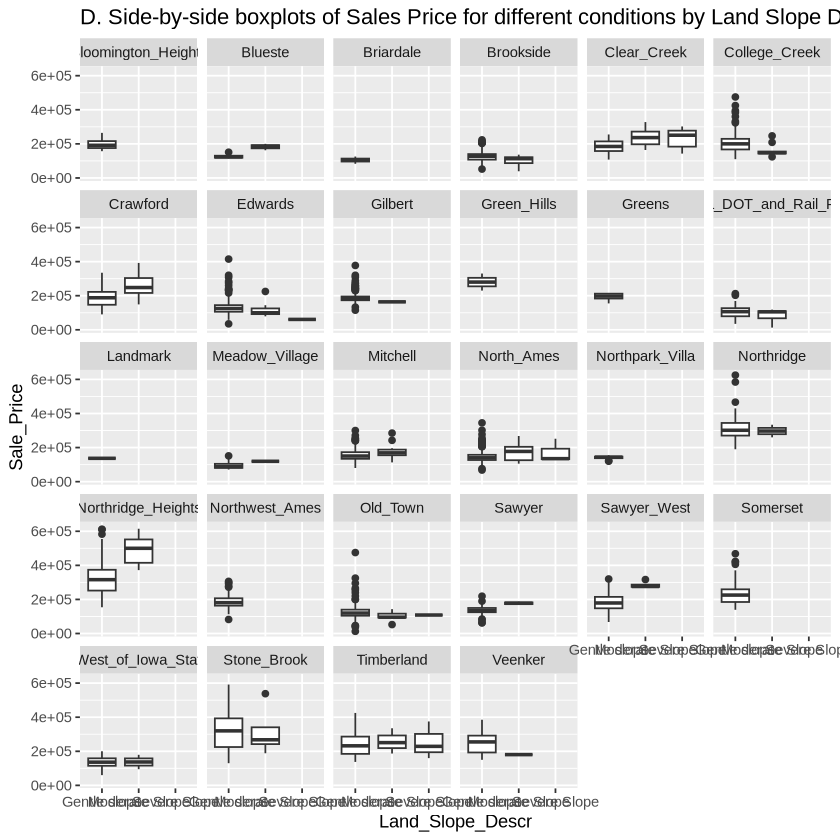

In [6]:
ds_ames %>% ggplot(aes(x=Land_Slope_Descr, y=Sale_Price)) + 
geom_boxplot()  + facet_wrap(~Neighborhood)+
labs(title="D. Side-by-side boxplots of Sales Price for different conditions by Land Slope Descr")

Which plot is the most appropriate to answer the primary statsitical problem? Write a brief explanation of the justification on how is this plot answering the primary statsitical problem. 

Hint: Interept the plot in the context of the primary statistical problem.

(10 points): 5 points for correctly selecting the most appropariate plot, 5 points for the justification on how the plot can answer the primary statsitical problem.


Answer: <br>
C. Side-by-side boxplots of Sales Price for different Land_Slope_Descr. <br>
My primary statstical problem is "Test whether there is a significant difference or comparing mean of the Sale Price between properties with Gentle slope and properties with Severe slope." A and B (scatterplots) are not suitable as it is more difficult to read the summary statistics from scatterplots as compared to box plots (C and D). I am comparing a categorical variable (land slope) and a continuous variable (sale price), thus box plots(C and D) would be more suitable for comparing such data types. C would be more suitable as compared to D as it answers the primary statstical problem. In contrast, D would be less suitable as in each neighbourhood, there is missing plots for severe slopes that is needed for my primary statistical problem. However, D could be suitable for my secondary statstical problem which takes into account the clustering variable, neighbourhood.

### 5. Discussion:

**Limitations and assumptions of the study design**

How are the study design limitations going to affect the strength of evidence for answering the research question? Write one limitations from the study design. 

Hint: 

- Start with identifying the study type. Was the study designed to answer the particular research questions, or was the dataset already available, dictating the choice of research questions that can be answered? The answer to this question will dictate your conclusions about the strength of the evidence with respect to the particular research question. If the research questions were formed based on the study design, then this study type is called "Exploratory," "Pilot," or "Hypothesis generating" study, which does not provide the highest strength of evidence.

Bonus: 
Write one more limitations from the study design.

Hint:

- Consider whether the comparison groups of interest for the primary statistical problem are comparable. Was the study designed to make these two groups comparable? Were the parcels randomly assigned to these comparison groups of interest to minimize comparability issues, or do you expect that other variables (covariates and confounders) may affect the sale prices (covariates) or both sale price and the land slope (confounders)?


(10 points): Identifying the study type and evaluating the strength of the evidence this study provides in addressing the primary statistical problem.

(Bonus 10 points): Identifying additional sources of bias, discussing the randomization (or lack thereof) of the comparison groups, and considering the potential bias introduced by other covariates and confounders.


Answer: <br>
The study type is explanatory as the dataset was not specifically collected to investigate our primary statstical problem. Thus, there may be missing or incomplete information related to the problem such as buyer preference, accessibility, crime rates in the neighbourhood, etc., which may potentially affect the sale price of the properties. Thus, this study may have some hidden confounders that we are unaware of.<br>

Another limitation is the lack of randomisation, as properties are not randomly distributed across different land slope categories. There may be over or under representation of properties, resulting in confounders that could mislead our conclusion about the relationship between the land slope and sale prices.

**Upload your work from Assignment 1**

- Each student will upload the Jupiter Notebook on Canvas Course 1: https://canvas.ubc.ca/courses/144703:

 `[Assignment_1]_[student name].ipynb`
eg., `Assignment_1_Biljana_Jonoska_Stojkova.ipynb`

- Please write at the title who was responsible for writing each paragraph. 

Navigate to the Assignments section on Canvas Course 1, and upload the Jupiter document on Canvas under: 
`Assignments\Assignment1` 
